## home brew
OSX 에서 편리하게 linux 개발 툴을 사용하기 위해 필수적으로 필요한 패키지 관리자입니다. (http://brew.sh/index_ko.html)

설치는 간단합니다. 아래와 같이 스크립트를 수행해 주면 됩니다.

```bash
> /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```

이제 필요한 linux 개발 툴들이 있으면 brew install 명령을 통해 손쉽게 설치할수 있습니다. 

## git, github.com

소스와 블로그의 버전을 관리하기 위해 brew 를 통해 버전 관리 툴인 git을 설치합니다.

```bash
> brew install git
```

소스와 블로그의 버전별 저장은 github.com 을 통해서 합니다. (프로젝트가 공개일 경우 무료입니다.)

github 하면 개발 소스 저장소가 가장 먼저 떠오르지만, github 에서는 얼마전부터 pages 라는 서비스를 통해 github 저장소에 올려놓은 웹 페이지 소스를 브라우저를 통해 볼수 있도록하면서, 웹 서버가 없어도 개인이 static 블로깅이 가능하도록 서비스하고 있습니다.

github.com에서는 github page 서비스를 통해 html페이지를 무료로 호스팅 해주고 있으므로 이 서비스를 잘 이용하면 손쉽게 개인 블로그를 운영이 가능합니다.

github page 프로젝트에 html 파일을 올리면 github.com 에서 자동으로 웹 호스팅을 해주게 됩니다. 예를 들어 저의 계정이 comafire 이고 제가 comafire.github.io 라는 프로젝트를 만들고 (프로젝트 이름은 [계정].github.io 로 고정되어 있습니다.) 이 프로젝트에 html 파일을을 넣어 놓으면 사람들은 https://comafire.github.io 주소를 통해 저의 블로그에 접근 할 수 있게 되는 것입니다. 

```bash
> git clone https://github.com/comafire/comafire.github.io
```

## pyenv, pyenv-virtualenv, autoenv

프로젝트를 진행할때, 파이썬의 특성상 파이썬 자체의 버전과 패키지 버전들에 대한 의존성이 생기게 됩니다. 프로젝트 별로 편리하게 의존성을 관리하기 위해 3가지 툴을 조합하여 사용합니다.

* pyenv: 로컬에 멀티 버전의 파이썬을 설치/사용, 파이썬 버전에 대한 의존성을 해결
* virtualenv: 로컬에 멀티 파이썬 환경을 설치/사용, 프로젝트별 패키지에 대한 의존성을 해결
* autoenv: 프로젝트 디렉토리에 들어갈때 마다 자동 환경 셋팅, .bash_profile 과 비슷한 역활

3가지 툴을 설치하고 기본 셋팅합니다.

```bash
> brew update
> brew install pyenv
> brew install pyenv-virtualenv
> brew install autoenv
> echo 'eval "$(pyenv init -)"' >> ~/.bash_profile 
> echo 'eval "$(pyenv virtualenv-init -)"' >> ~/.bash_profile
> echo 'source /usr/local/opt/autoenv/activate.sh' >> ~/.bash_profile
```

pyenv를 이용해 파이썬 여러 버전을 설치합니다. 주로 사용하는 2.x 대와 3.x 대의 최신 버전을 설치해 봅니다.

```bash
> pyenv install 2.7.13
> pyenv install 3.6.0
> pyenv versions
* system (set by /Users/comafire/.pyenv/version)
  2.7.13
  3.6.0
```

pyenv-virtualenv를 이용해 각 버전의 파이썬 가상환경을 만들어 봅니다.

```bash
> pyenv virtualenv 2.7.13 pyenv-2.7.13
> pyenv virtualenv 3.6.0 pyenv-3.6.0
> pyenv virtualenvs
  ...
  pyenv-2.7.13 (created from /Users/comafire/.pyenv/versions/2.7.13)
  pyenv-3.6.0 (created from /Users/comafire/.pyenv/versions/3.6.0)
```

이제 github page generator 를 위한 프로젝트를 생성하고 프로젝트의 기본 환경을 자동 셋팅할 수 있도록 autoenv를 사용해 봅니다. autoenv를 이용하면 프로젝트 폴더에 들어갈때 마다 특정 파이썬 가상환경을 활성화하는 명령을 일일이 하지 않고 프로젝트 폴더에 들어가면 자동으로 특정 버전의 파이썬 가상환경 활성화 하도록 할 수 있습니다.

예를 들어 github page generator를 위한 comafire.github.io 프로젝트 폴더를 만들고 들어갈 때 마다 nikola를 사용하기 위한 파이썬 3.x 버전의 가상환경을 자동 활성화가 가능하게 됩니다.

방법은 간단히 프로젝트의 최상위 폴더아래 .env 파일을 만들고 아래 내용을 적어주면 됩니다.

```bash
> vi .env

pyenv activate pyenv-3.6.0

```

해당 작업환경에서 나오고 싶다면 deactivate 명령을 사용하면 됩니다.

```bash
> pyenv deactivate
```

git clone을 통해 다운받은 comafire.github.io 아래에 .env 파일을 생성하고 해당 디렉토리로 들어가면 pyenv-3.6.0 이 활성화된 것을 볼 수 있습니다.

```bash
> cd comafire.github.io
(pyenv-3.6.0) > 
```

## nikola

nikola(https://getnikola.com)는 여러 jupyter, markdown 등 여러 타입의 파일을 html 형태로 변환하여 github page 서비스에서 사용할 수 있도록 해주는 툴입니다.

여기서는 comafire.github.io 는 위에서 설정한 pyenv-3.6.0 가상환경을 사용할 것이기 때문에 가상환경이 활성화된 상태에서 nikola 를 설치합니다.

```bash
(pyenv-3.6.0) > pip3 install nikola[extras]
```

이제 nikola 에서 jupyter notebook을 사용하기 위한 초기 셋팅을 해줍니다. 몇가지 질문에 답하면 nikola 에 필요한 파일을 자동으로 생성합니다.

```bash
> cd comafire.github.io-nikola
(pyenv-3.6.0) > nikola init .
Creating Nikola Site
====================
...
[2017-02-11T18:36:05Z] INFO: init: Created empty site at ..
...
```

이제 jupyter ipynb 확장자를 사용해서 html 생성이 가능하도록 테마 설치와 설정을 합니다. 현재 jupyter ipynb 확장자를 가장 깔끔하게 지원하는 테마는 zen-iptyhon 인거 같습니다. 해당 테마를 사용해 봅니다.

```bash
(pyenv-3.6.0) > nikola install_theme zen-ipython
```

conf.py 파일을 열어 테마 설정 및 jupyter 사용하도록 주요 설정을 합니다. (상세 설정은 nikola 홈피 참조)

```bash
(pyenv-3.6.0) > vi conf.py

# 테마를 위한 메뉴설정 (자신이 필요한 메뉴와 링크로 변경합니다.)
NAVIGATION_LINKS = {
    DEFAULT_LANG: (
        ('/index.html', 'Home', 'icon-home'),
        ('/archive.html', 'Archives', 'icon-folder-open-alt'),
        ('/categories/index.html', 'Tags', 'icon-tags'),
        ('/rss.xml', 'RSS', 'icon-rss'),
        ('/galleries/index.html', 'Galleries', 'icon-camera'),
        ('/aboutme.html', 'About me', 'icon-user'),
        ('https://github.com/comafire', 'My Github', 'icon-github'),
    )
}

# 테마 설정
THEME = "zen-ipython"

# jupyter 를 사용하기 위한 설정
POSTS = (
    ("posts/*.md", "posts", "post.tmpl"),
    ("posts/*.ipynb", "posts", "post.tmpl"),
    ("posts/*.txt", "posts", "post.tmpl"),
    ("posts/*.rst", "posts", "post.tmpl"),
    ("posts/*.html", "posts", "post.tmpl")
)

PAGES = (
    ("pages/*.md", "pages", "story.tmpl"),
    ("pages/*.ipynb", "pages", "story.tmpl"),
    ("pages/*.txt", "pages", "story.tmpl"),
    ("pages/*.rst", "pages", "story.tmpl"),
    ("pages/*.html", "pages", "story.tmpl")
)

# 시간대 설정
TIMEZONE = "Asia/Seoul"

# comment 시스템 설정
COMMENT_SYSTEM = "disqus"
COMMENT_SYSTEM_ID = "comafire"

# 이미지 갤러리 설정
GALLERY_FOLDERS = {"galleries": "galleries"}
THUMBNAIL_SIZE = 180
MAX_IMAGE_SIZE = 1280
USE_FILENAME_AS_TITLE = True
GALLERY_SORT_BY_DATE = True

# 만든 블로그를 Gtihub page 서비스에 deploy 하기 위한 설정 
GITHUB_SOURCE_BRANCH = 'src'
GITHUB_DEPLOY_BRANCH = 'master'
GITHUB_REMOTE_NAME = 'origin'
GITHUB_COMMIT_SOURCE = True
```

jupyter notebook용 post를 작성하기 위해 아래 명령으로 post를 생성하고 추후 설치할 jupyter 를 이용해 수정이 가능합니다.

```bash
(pyenv-3.6.0) > nikola new_post -f ipynb
```

수정 후 내용을 반영하고 로컬에서 확인하려면 build/server 명령을 이용하면 로컬에서 브라우저로 확인이 가능합니다.

```bash
(pyenv-3.6.0) > nikola build
(pyenv-3.6.0) > nikola server --port 8080
```

이후 github pages 서비스에 deploy 하려면 github_deploy 명령을 이용합니다.
github_deploy 명령을 수행하면 html 로 변경된 부분은 github repository에 master branch로 commit 되어 github page 서비스에 이용되고, 블로그 소스코드 부분은 src branch 로 commit 되어 집니다.

```bash
(pyenv-3.6.0) > nikola github_deploy
```

이제 github page 주소로 수정된 블로그 조회가 가능하게 됩니다.

이후 jupyter를 이용하여 블로그 수정 -> nikola build -> nikola server 로 로컬 확인 -> nikola github_deploy 로 github pages 에 발행 순서로 반복하면서 개발과 동시에 블로깅을 할수 있습니다.

새로 작성하는 블로그의 경우 new_post 명령을 통해서 작성이 가능하지만, 기존 작성한 jupyter notebook 파일들은 단순히 post 디렉토리에 복사한다고 하여 build가 되지 않습니다.

nokila 에서는 notebook 파일내에 metatdata 를 유지하고 있습니다. 기존의 작성된 notebook파일을 post 디렉토리안에 복사한 뒤 jupyter 메뉴중 [Edit] -> [Edit Notebook Metadata] 를 통해 meatadata 수정이 가능합니다.

아래와 같이 nikola metadata 부분을 추가해 주고 build를 하면 에러 없이 build 가 가능합니다.

```
{
  "kernelspec": {
    "name": "python3",
    "display_name": "Python 3",
    "language": "python"
  },
  "language_info": {
    "name": "python",
    "version": "3.6.0",
    "mimetype": "text/x-python",
    "codemirror_mode": {
      "name": "ipython",
      "version": 3
    },
    "pygments_lexer": "ipython3",
    "nbconvert_exporter": "python",
    "file_extension": ".py"
  },
  "nikola": {
    "category": "",
    "date": "2017-02-12 17:10:59 UTC+09:00",
    "description": "",
    "link": "",
    "slug": "jupyter-from-dev-to-blog-with-docker",
    "tags": "",
    "title": "jupyter-from-dev-to-blog-with-docker",
    "type": "text"
  }
}
```

## jupyter

jupyter의 의존 패키지인 zeromq를 brew로 설치후 jupyter를 설치합니다.

```bash
(pyenv-3.6.0) > brew install zmq
(pyenv-3.6.0) > pip3 install jupyter
```

jupyter 명령을 통해 jupyter-notebook 에 접속합니다. 

```bash
(pyenv-3.6.0) > jupyter notebook
```

이제 jupyter를 통해 python 을 사용할수 있습니다. 또한 jupyter에서는 terminal 기능도 제공하므로 jupyter를 띄울때 외에는 jupyter를 벗어나지 않고 거의 모든 작업이 가능합니다.  

그리고 그 화면을 Cmd + Shift + 4 키로 스크린 샷을 떠서 저장한 뒤에 블로그를 작성중인 이 notebook 에서 이미지를 뿌려보겠습니다.

본래는 jupyter에서 제공하는 markdown 기능을 통해 이미지를 본문에 삽입할 수도 있지만, 기존의 Pelican 과 Nikola 툴 모두 이 경우 이미지가 notebook 파일에 복사되는것이 아닌 링크만을 가지고 있게 되기 때문에 github page 에 deploy시 경로가 일치하지 않게 되어 링크가 깨지게 됩니다.

그래서 좀 불편하지만 이미지를 직접 불러와서 notebook의 output으로 출력하는 방법을 사용합니다. 이전 글에서 스크린샷으로 저장했던 이미지를 다시 한번 불러 보겠습니다.

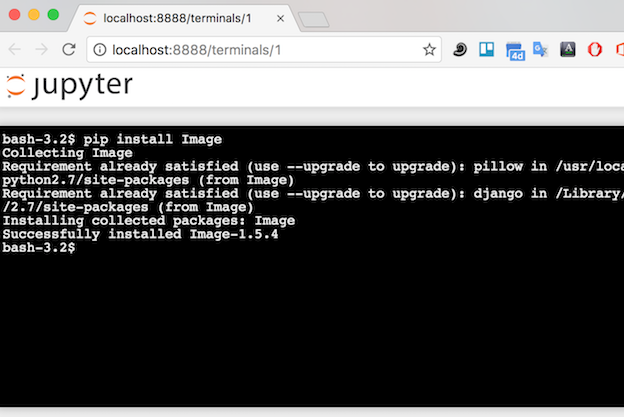

In [1]:
from IPython.display import Image
Image('../galleries/2016-08-26-Jupyter-From-Dev-To-Blogging-00.png', width=512)

## docker

docker는 시스템 단위에서 python 에서 pyenv 과 같은 존재입니다. 

사실 docker를 이용한다면 python 가상환경을 사용하지 않아도 프로젝트 단위로 docker 환경을 만들고 사용할 수 있습니다.

기존에는 docker 를 macOS 에 설치 및 사용하려면 삽질이 좀 필요했었으나, 지금은 Docker for Mac 이라는 패키지를 통해서 간단히 macOS 앱 설치하는 방식으로 설치가 가능합니다.

설치 방법은 아래 링크를 참조하세요.
* https://docs.docker.com/docker-for-mac/install/

게다가 macOS 용 HyperKit 사용으로 성능도 기존 방식보다 좋다고 하네요 ^^

docker 에 대한 상세 사용법은 아래 링크를 참조하시면 됩니다.

* http://pyrasis.com/Docker/Docker-HOWTO

개발을 하다가 보면 그때 그때 필요해서 여러 패키지를 설치하지만, 정리해 놓지 않으면 환경을 다시 구성하기 힘들때가 많습니다.

Dockerfile 을 이용하면 그때 그때 개발 환경 셋팅을 정리해서 이미지로 빌드 할 수 있기에 초기 학습시간은 들지만 이후 개발 환경 셋팅의 삽질에 낭비하는 시간을 많이 줄일 수 있습니다.

현재 블로깅시 사용하는 도커이미지는 https://github.com/comafire/docker-jupyter 에 올려져 있으므로 참조하여 사용하시면 됩니다.
